In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import pyqg
from pyqg import diagnostic_tools as tools

## Defining Basic simulation parameters

In [2]:
year = 24*60*60*360.
base_kwargs = dict(dt=3600., tmax=10*year, tavestart=5*year, twrite=25000)


# High-res model with/without hyperdiffusion

In [ ]:
high_res = pyqg.QGModel(nx=256, **base_kwargs)
high_res.run()

high_res_nhpd = pyqg.QGModel(nx=256, hyperdiff = False, **base_kwargs)
high_res_nhpd.run()

## Defining differnet Cases

In [3]:
bnn = { "beta": 1.5e-11, #[m^-1 s^-1]
       "delta": 0.25,
       "rek": 5.78e-7, #[s^-1]
       "rd": 15e3, # [m]
}

case1 = { "beta": bnn["beta"]*2/3,
            "delta": bnn["delta"]*2/5,
            "rek": bnn["rek"]*3/25,
            "rd": bnn["rd"],
}

case2 = { "beta": bnn["beta"]*3/10,
            "delta": bnn["delta"]*1/5,
            "rek": bnn["rek"]*3/50,
            "rd": bnn["rd"],
}

case3 = { "beta": bnn["beta"],
            "delta": bnn["delta"],
            "rek": bnn["rek"],
            "rd": bnn["rd"]*4/3,
}

# Setting different cases:
### Low-Res / High-Res
### Different cases: Jet vs. eddy config
### Hyperdiffusion on and off

In [ ]:
year = 24*60*60*360.
base_kwargs = dict(dt=3600., tmax=10*year, tavestart=5*year, twrite=10000)

bnn_lowres = pyqg.QGModel(nx = 64, **base_kwargs, **bnn)
bnn_highres = pyqg.QGModel(nx = 256, **base_kwargs, **bnn)

case1_lowres = pyqg.QGModel(nx = 64, **base_kwargs, **case1)
case1_highres = pyqg.QGModel(nx = 256, **base_kwargs, **case1)

case2_lowres = pyqg.QGModel(nx = 64, **base_kwargs, **case2)
case2_highres = pyqg.QGModel(nx = 256, **base_kwargs, **case2)

case3_lowres = pyqg.QGModel(nx = 64, **base_kwargs, **case3)
case3_highres = pyqg.QGModel(nx = 256, **base_kwargs, **case3)

# For turning off hyperdiffusion, set rhyperdiff = False

bnn_lowres_nhpd = pyqg.QGModel(nx = 64, hyperdiff = False, **base_kwargs, **bnn)
bnn_highres_nhpd = pyqg.QGModel(nx = 256, hyperdiff = False, **base_kwargs, **bnn)

case1_lowres_nhpd = pyqg.QGModel(nx = 64, hyperdiff = False, **base_kwargs, **case1)
case1_highres_nhpd = pyqg.QGModel(nx = 256, hyperdiff = False, **base_kwargs, **case1)

case2_lowres_nhpd = pyqg.QGModel(nx = 64, hyperdiff = False, **base_kwargs, **case2)
case2_highres_nhpd = pyqg.QGModel(nx = 256, hyperdiff = False, **base_kwargs, **case2)

case3_lowres_nhpd = pyqg.QGModel(nx = 64, hyperdiff = False, **base_kwargs, **case3)
case3_highres_nhpd = pyqg.QGModel(nx = 256, hyperdiff = False, **base_kwargs, **case3)

#### Choose which model to run:

In [7]:
# print("BNN High-res")
# bnn_lowres.run()
# print("BNN Low-res")
# bnn_highres.run()

# print("Case1 Low-res")
# case1_lowres.run()
# print("Case1 High-res")
# case1_highres.run()

print("Case2 Low-res")
case2_lowres.run()
print("Case2 High-res")
case2_highres.run()

# print("Case3 Low-res")
# case3_lowres.run()
# print("Case3 High-res")
# case3_highres.run()

# Hyperdiffusion off
# print("BNN High-res")
# bnn_lowres_nhpd.run()
# print("BNN Low-res")
# bnn_highres_nhpd.run()

# print("Case1 Low-res")
# case1_lowres_nhpd.run()
# print("Case1 High-res")
# case1_highres_nhpd.run()

# print("Case2 Low-res")
# case2_lowres_nhpd.run()
# print("Case2 High-res")
# case2_highres_nhpd.run()

# print("Case3 Low-res")
# case3_lowres_nhpd.run()
# print("Case3 High-res")
# case3_highres_nhpd.run()


Case2 Low-res


INFO: Step: 25000, Time: 9.00e+07, KE: 1.35e-05, CFL: 0.008
INFO: Step: 50000, Time: 1.80e+08, KE: 2.63e-04, CFL: 0.060
INFO: Step: 75000, Time: 2.70e+08, KE: 1.62e-04, CFL: 0.044


Case2 High-res


INFO: Step: 25000, Time: 9.00e+07, KE: 1.10e-06, CFL: 0.024
INFO: Step: 50000, Time: 1.80e+08, KE: 4.59e-04, CFL: 0.311


#### Creating dataset out of them:

In [11]:
# bnn_lowres_ds = bnn_lowres.to_dataset().isel(time=-1)
# bnn_highres_ds = bnn_highres.to_dataset().isel(time=-1)

# case1_lowres_ds = case1_lowres.to_dataset().isel(time=-1)
# case1_highres_ds = case1_highres.to_dataset().isel(time=-1)

case2_lowres_ds = case2_lowres.to_dataset().isel(time=-1)
case2_highres_ds = case2_highres.to_dataset().isel(time=-1)

# case3_lowres_ds = case3_lowres.to_dataset().isel(time=-1)
# case3_highres_ds = case3_highres.to_dataset().isel(time=-1)

# Hyper Diffusion Off
# bnn_lowres_nhpd_ds = bnn_lowres_nhpd.to_dataset().isel(time=-1)
# bnn_highres_nhpd_ds = bnn_highres_nhpd.to_dataset().isel(time=-1)

# case1_lowres_nhpd_ds = case1_lowres_nhpd.to_dataset().isel(time=-1)
# case1_highres_nhpd_ds = case1_highres_nhpd.to_dataset().isel(time=-1)

# case2_lowres_nhpd_ds = case2_lowres_nhpd.to_dataset().isel(time=-1)
# case2_highres_nhpd_ds = case2_highres_nhpd.to_dataset().isel(time=-1)

# case3_lowres_nhpd_ds = case3_lowres_nhpd.to_dataset().isel(time=-1)
# case3_highres_nhpd_ds = case3_highres_nhpd.to_dataset().isel(time=-1)

# Testing my CNNparametrization

In [9]:
import torch
import torch.nn as nn
from pyqg import Parameterization

class CNNparametrization(Parameterization):
    def __init__(self, model_type, model_path):
        super().__init__()
        self.model = self.init_model(model_type, model_path)

    def __call__(self, m):
        # Here you will need to transform your model `m` into the appropriate input tensor for the CNN
        # As I don't know the exact structure of your model and the expected input for the CNN, 
        # I'm using a placeholder function `prepare_input(m)`. You will need to implement this function.
        input_tensor = self.prepare_input(m) 
        # Then you can use the evaluate_model function to get the output of the CNN
        output = self.evaluate_model(self.model, input_tensor)
        return output
    
    @staticmethod
    def prepare_input(m):
        # get the model variables 'u' and 'v'
        u = m.u
        v = m.v
        # Ensure that 'u' and 'v' are numpy arrays
        if not isinstance(u, np.ndarray):
            u = np.array(u)
        if not isinstance(v, np.ndarray):
            v = np.array(v)
        # concatenate 'u' and 'v' across the first axis
        combined = np.concatenate((u, v), axis=0)
        # Convert the combined array to a torch tensor
        input_tensor = torch.from_numpy(combined)
        # Ensure the tensor is of the right type
        input_tensor = input_tensor.float()
        return input_tensor
    
    @staticmethod
    def evaluate_model(model, input_tensor):
        # Set device to GPU if available, otherwise use CPU
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        # Move the input tensor to the specified device
        input_tensor = input_tensor.to(device=device)
        
        # Normalize the input tensor
        training_mean_std = {
            "input_mean_train": torch.tensor([1.5142133559390217e-14, -2.3737904545663435e-13, 1.2836868070256746e-12, -3.642309706879815e-13]).to(device),
            "input_std_train": torch.tensor([0.04329422116279602, 0.00804091151803732, 0.043515775352716446, 0.007541385013610125]).to(device),
            "output_mean_train": torch.tensor([-4.4214735503544034e-23, 2.5631344976210459e-26]).to(device),
            "output_std_train": torch.tensor([2.8334667511592526e-12, 9.65022603927751e-15]).to(device)
        }
        
        input_tensor = (input_tensor - training_mean_std["input_mean_train"][:, None, None]) / training_mean_std["input_std_train"][:, None, None]
        
        # Pass the input tensor through the model
        output, _ = model(input_tensor)
        
        # Denormalize the output tensor
        output = output * training_mean_std["output_std_train"][:, None, None] + training_mean_std["output_mean_train"][:, None, None]
        
        # Move the output tensor back to the CPU and numpy
        output = output.cpu().detach().numpy()
        
        # Ensure 'output' is of type float64
        output = output.astype(np.float64)

        return output

    
    @staticmethod
    def init_model(model_type, model_path):
        # Define the ConvNeuralNet classes for each model type
        if model_type == 'deep':
            class ConvNeuralNet(nn.Module):
                
                # Determine what layers and their order in CNN object
                def __init__(self, num_classes):

                        super(ConvNeuralNet, self).__init__()

                        # Input Layer
                        self.conv_layer1 = nn.Conv2d(in_channels=4, out_channels=64, kernel_size=5, padding="same")
                        
                        # Hidden layers
                        self.conv_layer2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                        self.conv_layer3 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                        self.conv_layer5 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                        self.conv_layer6 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                        self.conv_layer7 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                        # self.conv_layer8 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                        # self.conv_layer9 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                        # self.conv_layer10 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=5, padding="same")
                        
                        # Output layer
                        self.conv_layer11 = nn.Conv2d(in_channels=64, out_channels=2, kernel_size=5, padding="same")
                        
                        # Activation function
                        self.relu1 = nn.ReLU()
                        
                def forward(self, x):

                        out1_before = self.conv_layer1(x) # Layer1 (Input Layer)
                        out1_after = self.relu1(out1_before) # Layer1 (Input Layer)    
                        
                        ## Hidden Layers
                        out2_before = self.conv_layer2(out1_after) #Layer2
                        out2_after = self.relu1(out2_before) #Layer2
                    
                        out3_before = self.conv_layer3(out2_after) #Layer3
                        out3_after = self.relu1(out3_before) #Layer3

                        out4_before = self.conv_layer4(out3_after) #Layer4
                        out4_after = self.relu1(out4_before) #Layer4

                        out5_before = self.conv_layer5(out4_after) #Layer5
                        out5_after = self.relu1(out5_before) #Layer5

                        out6_before = self.conv_layer6(out5_after) #Layer6
                        out6_after = self.relu1(out6_before) #Layer6

                        out7_before = self.conv_layer7(out6_after) #Layer7
                        out7_after = self.relu1(out7_before) #Layer7

                        # out8 = self.relu1(self.conv_layer8(out7)) #Layer8

                        # out9 = self.relu1(self.conv_layer9(out8)) #Layer9

                        # out10 = self.relu1(self.conv_layer10(out9)) #Layer10
                        
                        ####  !!! Do not forget to change teh output layer when changing the number of hidden layers !!! ####

                        output = self.conv_layer11(out7_after) #Layer11 (Output Layer) 
                        mid_ouptut = {'out1_before': out1_before, 'out1_after': out1_after, 'out2_before': out2_before, 'out2_after': out2_after, 'out3_before': out3_before, 'out3_after': out3_after, 'out4_before': out4_before, 'out4_after': out4_after, 'out5_before': out5_before, 'out5_after': out5_after, 'out6_before': out6_before, 'out6_after': out6_after, 'out7_before': out7_before, 'out7_after': out7_after}
                        return output, mid_ouptut
        else:
            print('Invalid model type. Please choose from "deep" or "shallow"')

        # Set device to GPU if available, otherwise use CPU
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Create model instance and move it to the specified device
        model = ConvNeuralNet(1).to(device=device)

        # Load the checkpoint
        checkpoint = torch.load(model_path, map_location=device)

        # Extract the model_state_dict from the checkpoint
        model_state_dict = checkpoint['model_state_dict']

        # Load the state dictionary into the model
        model.load_state_dict(model_state_dict)

        # Move the model to the specified device
        model.to(device)

        # Set the model to evaluation mode
        model.eval()

        return model

    @property
    def parameterization_type(self):
        return "q_parameterization"

## Initialize the CNN parameterization class

In [10]:
model_type = "deep"
model_path = "BestModelBasedOnTestLoss_1.pt"

# First, create an instance of your CNNparametrization class
cnn_parametrization = CNNparametrization(model_type, model_path)

In [11]:
def run_parameterized_model(parameterization, case, base_kwargs):
    model = pyqg.QGModel(nx=64, parameterization=parameterization, **case , **base_kwargs)
    model.run()
    return model

In [12]:
smagorinsky_case2 = run_parameterized_model(
    pyqg.parameterizations.Smagorinsky(constant=0.08), case2, base_kwargs)

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 1.44e-06, CFL: 0.006
INFO: Step: 50000, Time: 1.80e+08, KE: 2.74e-04, CFL: 0.052
INFO: Step: 75000, Time: 2.70e+08, KE: 1.36e-04, CFL: 0.044


In [16]:
year = 24*60*60*360.
# case2_model = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=5*year, **case2)
case2_model_param = pyqg.QGModel(tmax=10*year, twrite=10000, tavestart=5*year, **case2, parameterization=cnn_parametrization)
# case2_model.run()
case2_model_param.run()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 10000, Time: 7.20e+07, KE: 6.42e-06, CFL: 0.025
INFO: Step: 20000, Time: 1.44e+08, KE: 9.10e-05, CFL: 0.070
INFO: Step: 30000, Time: 2.16e+08, KE: 1.24e-04, CFL: 0.096
INFO: Step: 40000, Time: 2.88e+08, KE: 1.41e-04, CFL: 0.079


In [16]:
backscatter_case2 = run_parameterized_model(
    pyqg.parameterizations.BackscatterBiharmonic(smag_constant=0.08, back_constant=1.1), case2, base_kwargs)

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/media/volume/sdc/qg/pyqg/pyqg/pyqg/model.py", line 217, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized
INFO: Step: 25000, Time: 9.00e+07, KE: 2.88e-06, CFL: 0.006
INFO: Step: 50000, Time: 1.80e+08, KE: 2.79e-04, CFL: 0.051
INFO: Step: 75000, Time: 2.70e+08, KE: 1.98e-04, CFL: 0.048


In [ ]:
def label_for(sim):
    return f"nx={sim.nx}, {sim.parameterization or 'unparameterized'}"

plt.figure(figsize=(15,6))
plt.rcParams.update({'font.size': 12})
vlim = 2e-5
for i, sim in enumerate([case2_highres, case2_lowres, smagorinsky_case2, backscatter_case2]):
    plt.subplot(2, 4, i+1, title=label_for(sim).replace(',',",\n").replace('Biharmonic',''))
    plt.imshow(sim.q[0], vmin=-vlim, vmax=vlim, cmap='bwr')
    plt.xticks([]); plt.yticks([])
    if i == 0: plt.ylabel("Upper PV\n[$s^{-1}$]", rotation=0, va='center', ha='right', fontsize=14)
    if i == 3: plt.colorbar()

vlim = 2e-2
for i, sim in enumerate([case2_highres, case2_lowres, smagorinsky_case2, backscatter_case2]):
    plt.subplot(2, 4, i+5)
    plt.imshow((sim.u**2 + sim.v**2).sum(0), vmin=0, vmax=vlim, cmap='inferno')
    plt.xticks([]); plt.yticks([])
    if i == 0: plt.ylabel("KE density\n[$m^2 s^{-2}$]", rotation=0, va='center', ha='right', fontsize=14)
    if i == 3: plt.colorbar()

plt.tight_layout()

In [ ]:
case2_ds = case2_model.to_dataset().isel(time=-1)
case2_ds_param = case2_model_param.to_dataset().isel(time=-1)

In [ ]:
kr, kespec_upper_case2 = tools.calc_ispec(case2_model, case2_ds.KEspec.isel(lev=0).data)
_, kespec_lower_case2 = tools.calc_ispec(case2_model, case2_ds.KEspec.isel(lev=1).data)

# param
kr_param, kespec_upper_case2_param = tools.calc_ispec(case2_model_param, case2_ds_param.KEspec.isel(lev=0).data)
_, kespec_lower_case2_param = tools.calc_ispec(case2_model_param, case2_ds_param.KEspec.isel(lev=1).data)



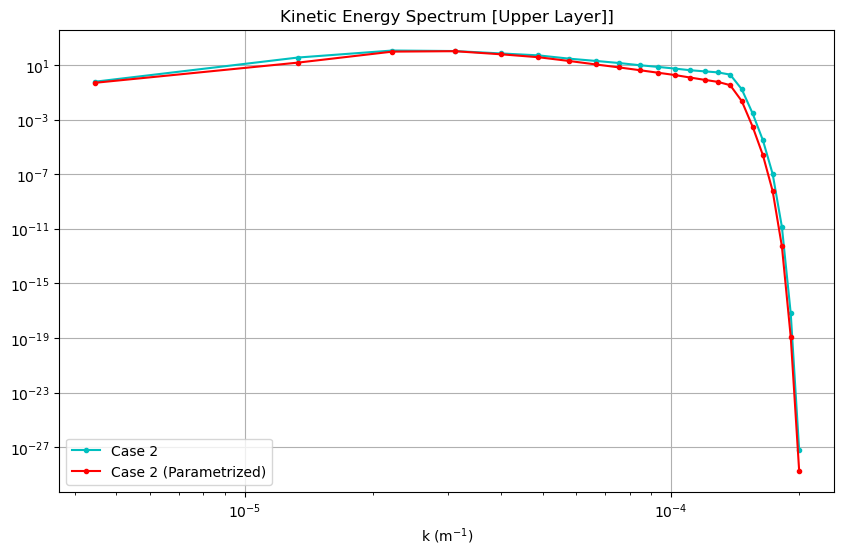

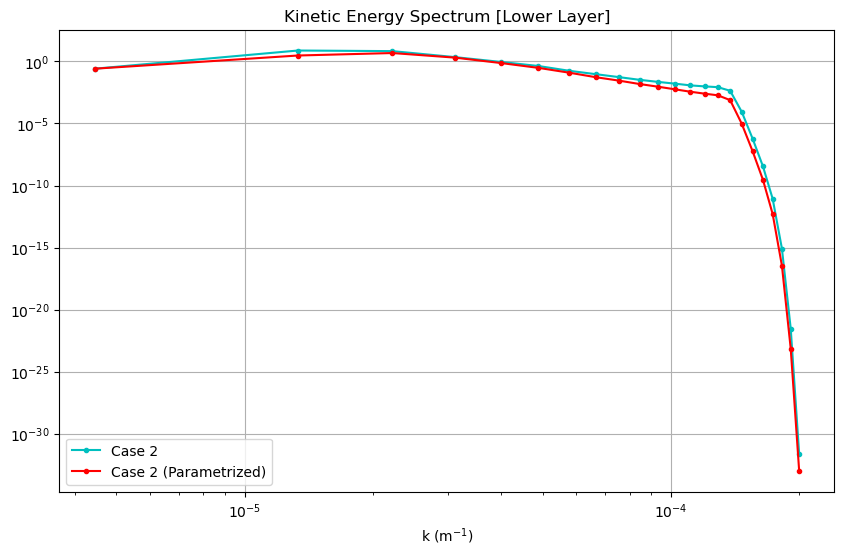

In [ ]:
# Creating subplots
plt.figure(figsize=(10,6))
plt.loglog(kr, kespec_upper_case2, 'c.-', label='Case 2')
plt.loglog(kr_param, kespec_upper_case2_param, 'r.-', label='Case 2 (Parametrized)')
plt.legend(loc='lower left')
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()
plt.title('Kinetic Energy Spectrum [Upper Layer]]')

plt.figure(figsize=(10,6))
plt.loglog(kr, kespec_lower_case2, 'c.-', label='Case 2')
plt.loglog(kr_param, kespec_lower_case2_param, 'r.-', label='Case 2 (Parametrized)')
plt.title('Kinetic Energy Spectrum [Lower Layer]')
plt.legend(loc='lower left')
plt.xlabel(r'k (m$^{-1}$)'); plt.grid()

plt.show()